# Stock Forecast

In [1]:
look_ahead = 365 #how many days into the future is to be forecasted
column_name = "CLOSE"

In [2]:
%matplotlib inline
import pandas as pd

data = pd.read_csv("2018.csv",index_col=0,encoding='latin1')
data.head()

,OPEN,LOW,HIGH,CLOSE,VOLUME
DATE,,,,,
2018-01-03,4.03,4.00,4.03,4.00,36000.0
2018-01-04,4.02,4.00,4.02,4.00,35000.0
2018-01-08,3.95,3.88,4.00,4.00,13000.0
2018-01-09,4.36,4.36,4.47,4.46,23000.0
2018-01-10,4.06,4.06,4.46,4.46,11000.0


Right now our index is actually just a list of strings that look like a date, we'll want to adjust these to be timestamps, that way our forecasting analysis will be able to interpret these values:

In [3]:
data.index

Index(['2018-01-03', '2018-01-04', '2018-01-08', '2018-01-09', '2018-01-10',
       '2018-01-11', '2018-01-12', '2018-01-15', '2018-01-16', '2018-01-17',
       ...
       '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07',
       '2018-12-10', '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-28'],
      dtype='object', name='DATE', length=184)

In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data.head()

,OPEN,LOW,HIGH,CLOSE,VOLUME
DATE,,,,,
2018-01-03,4.03,4.00,4.03,4.00,36000.0
2018-01-04,4.02,4.00,4.02,4.00,35000.0
2018-01-08,3.95,3.88,4.00,4.00,13000.0
2018-01-09,4.36,4.36,4.47,4.46,23000.0
2018-01-10,4.06,4.06,4.46,4.46,11000.0


In [6]:
data.index

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
               '2018-01-16', '2018-01-17',
               ...
               '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06',
               '2018-12-07', '2018-12-10', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-28'],
              dtype='datetime64[ns]', name='DATE', length=184, freq=None)

# ARIMA
## ARIMA stands for Auto-Regressive Integrated Moving Average.
There are three integers (p, d, q) that are used to parametrize ARIMA models. Because of that, a nonseasonal ARIMA model is denoted with ARIMA(p, d, q):

p is the number of autoregressive terms (AR part). It allows to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
d is the number of nonseasonal differences needed for stationarity. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
q is the number of lagged forecast errors in the prediction equation (MA part). This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.
When dealing with seasonal effects, as in our example, seasonal ARIMA is used, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the nonseasonal parameters described above, (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series.

In [7]:
df = data[column_name].to_frame()

In [8]:
minimum_date = df.index.min()
maximum_date = df.index.max()
print(minimum_date, maximum_date)

2018-01-03 00:00:00 2018-12-28 00:00:00


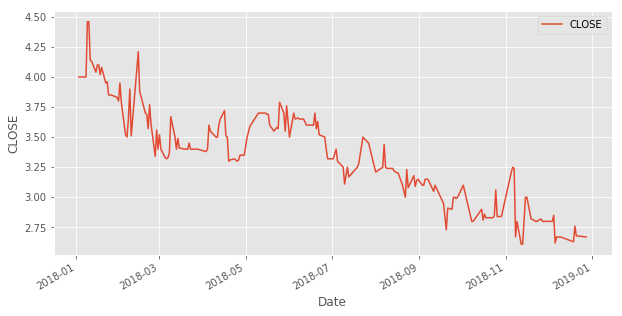

In [9]:
import matplotlib.pyplot as plt

# Defaults
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

df.plot()
plt.ylabel(column_name)
plt.xlabel('Date')
plt.show()

In [10]:
import itertools

# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
import datetime
oe_train = df

In [12]:
oe_train

,CLOSE
DATE,
2018-01-03,4.00
2018-01-04,4.00
2018-01-08,4.00
2018-01-09,4.46
2018-01-10,4.46
2018-01-11,4.14
2018-01-12,4.13
2018-01-15,4.04
2018-01-16,4.10


In [13]:
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(oe_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [14]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is -218.3176231702463 for model SARIMAX(2, 0, 1)x(0, 0, 0, 12)


In [15]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(oe_train,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

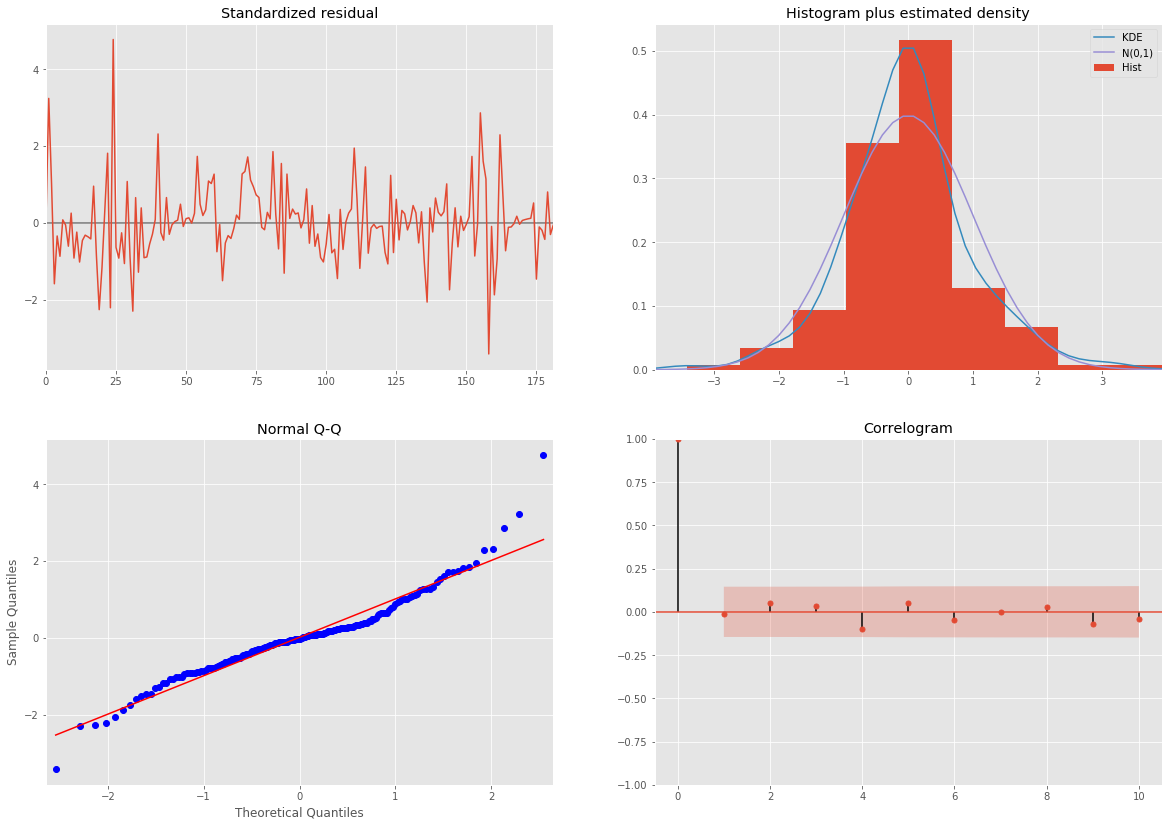

In [16]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()
plt.close()

In [17]:
pred1 = results.get_prediction(dynamic=False)
pred1_ci = pred1.conf_int()

In [18]:
pred1_ci

,lower CLOSE,upper CLOSE
DATE,,
2018-01-03,-1959.963985,1959.963985
2018-01-04,-1954.504062,1965.423940
2018-01-08,3.667645,4.319316
2018-01-09,3.705951,4.274642
2018-01-10,4.050145,4.590240
2018-01-11,4.090068,4.616612
2018-01-12,3.915911,4.435106
2018-01-15,3.897153,4.412071
2018-01-16,3.833898,4.346226


In [19]:
pred2 = results.get_forecast(steps=look_ahead)
maximum_date = pred1_ci.index.max()
pred2_ci = pred2.conf_int()

In [20]:
pred2_ci.index = pd.date_range(start=str(maximum_date+pd.offsets.DateOffset(days=1)), end=str(maximum_date+pd.offsets.DateOffset(days=look_ahead)), freq='D')
pred2_ci

,lower CLOSE,upper CLOSE
2018-12-29,2.414574,2.922484
2018-12-30,2.372437,2.954844
2018-12-31,2.349152,2.965861
2019-01-01,2.330756,2.971096
2019-01-02,2.314070,2.974316
2019-01-03,2.298151,2.976678
2019-01-04,2.282678,2.978584
2019-01-05,2.267528,2.980185
2019-01-06,2.252647,2.981545
2019-01-07,2.238007,2.982697


In [21]:
pred2.predicted_mean

184    2.668529
185    2.663640
186    2.657506
187    2.650926
188    2.644193
189    2.637415
190    2.630631
191    2.623856
192    2.617096
193    2.610352
194    2.603625
195    2.596915
196    2.590222
197    2.583547
198    2.576889
199    2.570248
200    2.563624
201    2.557017
202    2.550427
203    2.543854
204    2.537298
205    2.530759
206    2.524237
207    2.517732
208    2.511243
209    2.504771
210    2.498316
211    2.491877
212    2.485455
213    2.479050
         ...   
519    1.125518
520    1.122617
521    1.119724
522    1.116838
523    1.113960
524    1.111089
525    1.108226
526    1.105370
527    1.102521
528    1.099680
529    1.096846
530    1.094019
531    1.091199
532    1.088387
533    1.085582
534    1.082784
535    1.079994
536    1.077211
537    1.074434
538    1.071665
539    1.068904
540    1.066149
541    1.063401
542    1.060661
543    1.057927
544    1.055201
545    1.052481
546    1.049769
547    1.047063
548    1.044365
Length: 365, dtype: floa

In [22]:
pred2_pred_mean = pred2.predicted_mean #series
pred2_pred_mean_frame = pred2_pred_mean.to_frame() #frame
pred2_pred_mean_frame.index = pred2_ci.index

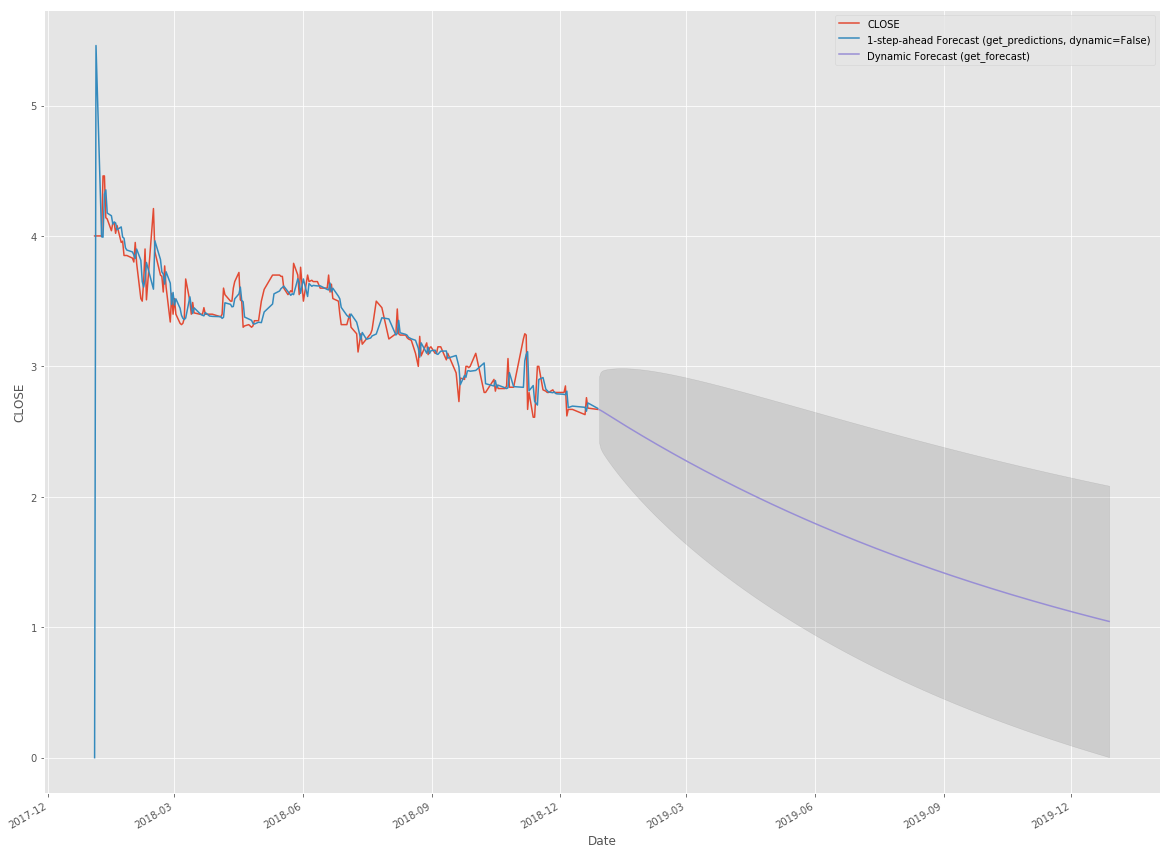

In [23]:
ax = oe_train.plot(figsize=(20, 16))
pred1_ci.index = pd.to_datetime(pred1_ci.index)
pred2_ci.index = pd.to_datetime(pred2_ci.index)
pred1.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred2_pred_mean_frame.squeeze().plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel(column_name)
plt.xlabel('Date')
plt.legend()
plt.show()
plt.close()

In [24]:
dtp = date_to_predict = '2019-06-10' #what is the desired date where the prediction is to be obtained
pretty_date = datetime.datetime(int(dtp.split("-")[0]), int(dtp.split("-")[1]), int(dtp.split("-")[2]))
pretty_date = pretty_date.strftime("%B %d, %Y") 
predictions = pred2_pred_mean_frame.squeeze().to_frame()
predictions.index.name = "Future Date"
predictions = predictions[predictions.index > oe_train.index.max()]
print("On "+pretty_date+", the predicted "+column_name+" is: "+"{}".format(predictions[predictions.index == date_to_predict].values[0][0])+".")

On June 10, 2019, the predicted CLOSE is: 1.7543330749458594.
